<a href="https://colab.research.google.com/github/ckj18/ML/blob/main/Tobigs_StyleDrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StyleDrop Demo

<p align="left">
  <a href="https://huggingface.co/spaces/zideliu/styledrop"><img alt="Huggingface" src="https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-StyleDrop-orange"></a>
  <a href="https://replicate.com/cjwbw/styledrop"><img src="https://replicate.com/cjwbw/styledrop/badge"></a>
</p>

This is an unofficial PyTorch implementation of [StyleDrop: Text-to-Image Generation in Any Style](https://arxiv.org/abs/2306.00983), based on [zideliu's implementation](https://github.com/zideliu/StyleDrop-PyTorch).

<img src="https://raw.githubusercontent.com/zideliu/StyleDrop-PyTorch/main/img/1.png"/>
<img src="https://raw.githubusercontent.com/zideliu/StyleDrop-PyTorch/main/img/2.png"/>
<img src="https://raw.githubusercontent.com/zideliu/StyleDrop-PyTorch/main/img/5.png"/>


**You need Colab Pro to train this model, with A100 enabled (~20Gb GPU RAM).**

In [2]:
!nvidia-smi

Thu Jul 13 22:16:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    42W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd drive/MyDrive

/content/drive/MyDrive


# Setup

In [5]:
!git clone https://github.com/neild0/StyleDrop-PyTorch-Interactive
!mv StyleDrop-PyTorch-Interactive StyleDrop-PyTorch

!pip install omegaconf gdown accelerate==0.12.0 absl-py ml_collections einops wandb ftfy==6.1.1 transformers==4.23.1 loguru webdataset==0.2.5 gradio xformers

Cloning into 'StyleDrop-PyTorch-Interactive'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 408 (delta 64), reused 111 (delta 60), pack-reused 289
Receiving objects: 100% (408/408), 44.11 MiB | 11.09 MiB/s, done.
Resolving deltas: 100% (118/118), done.
Updating files: 100% (265/265), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.0/144.0 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 89.6 MB/s eta 0:00:00
 

In [6]:
!git lfs install
!git clone https://huggingface.co/nzl-thu/MUSE
!mv MUSE/assets/* StyleDrop-PyTorch/assets/
!rm -rf MUSE

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'MUSE'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25
Unpacking objects: 100% (25/25), 3.01 KiB | 15.00 KiB/s, done.
Filtering content: 100% (12/12), 9.08 GiB | 70.37 MiB/s, done.
fatal: cannot exec '/content/drive/MyDrive/MUSE/.git/hooks/post-checkout': Permission denied
Encountered 1 file(s) that may not have been copied correctly on Windows:
	assets/ckpts/cc3m-285000.ckpt/optimizer.pth

See: `git lfs help smudge` for more details.


In [7]:
!gdown --id '13S_unB87n6KKuuMdyMnyExW0G1kplTbP' --output StyleDrop-PyTorch/assets/vqgan_jax_strongaug.ckpt

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13S_unB87n6KKuuMdyMnyExW0G1kplTbP
To: /content/drive/MyDrive/StyleDrop-PyTorch/assets/vqgan_jax_strongaug.ckpt
100% 218M/218M [00:17<00:00, 12.3MB/s]


In [14]:
!python StyleDrop-PyTorch/extract_empty_feature.py

2023-07-13 22:56:49.714 | DEBUG    | open_clip.transformer:__init__:314 - xattn in transformer of CLIP is True
2023-07-13 22:57:04.431 | DEBUG    | open_clip.transformer:__init__:314 - xattn in transformer of CLIP is True
torch.Size([1, 77, 1280])


#Set Style

Saving image_01.jpg to image_01.jpg


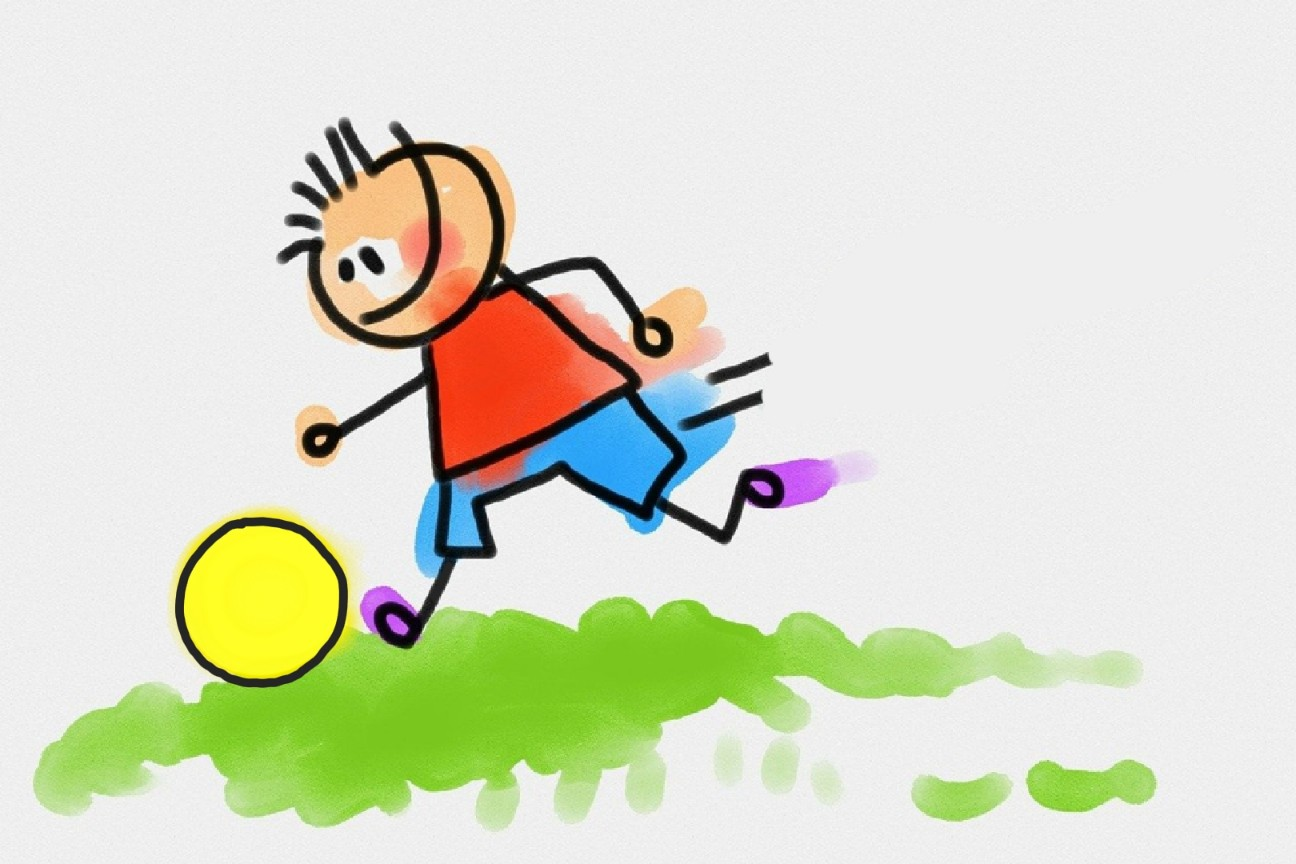

In [15]:
#@title Upload Style File

import shutil
from google.colab import files
import os
from IPython.display import Image, display

# specify the directory you want to move the file to
directory = "/content/drive/MyDrive/StyleDrop-PyTorch/data"

# get all the files in the directory
uploaded = files.upload()

if len(uploaded.keys()) != 1:
    raise Exception("Please only select one file")

for fn in uploaded.keys():

    extension = os.path.splitext(fn)[1]

    if extension == '.jpg':
        # move the file and get the new path
        new_path = shutil.move(fn, f"{directory}/{fn.replace(' ', '_')}")

        # display the image
        display(Image(filename=new_path))

    else:
        raise Exception("Please only select jpg files")


In [16]:
#@title Describe style image
import json

object_in_image = "A boy" #@param {type:"string"}
style_of_image = "in kid crayon drawing style" #@param {type:"string"}

file_name = os.path.basename(new_path)
one_style = {file_name: [object_in_image, f"in {style_of_image} style"]}
with open("/content/drive/MyDrive/StyleDrop-PyTorch/data/one_style.json", "w") as f:
    json.dump(one_style, f)

# Train model

In [11]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [17]:
import os
import subprocess
import glob

if 'EVAL_CKPT' in os.environ:
    del os.environ['EVAL_CKPT']

if 'ADAPTER' in os.environ:
    del os.environ['ADAPTER']

style_output_folder = style_of_image.replace(" ", "_")

os.environ['OUTPUT_DIR'] = style_output_folder

!cd StyleDrop-PyTorch && accelerate launch --mixed_precision fp16 train_t2i_custom_v2.py --config=configs/custom.py

# get a list of all subdirectories
subdirs = glob.glob(f"/content/drive/MyDrive/StyleDrop-PyTorch/{style_output_folder}/ckpts_II/" + '*/')
subdirs.sort()

last_subdir = subdirs[-1]
adapter = f"{last_subdir}/adapter.pth"

new_adapter_path = f"/content/drive/MyDrive/StyleDrop-PyTorch/style_adapter/{style_output_folder}"
os.makedirs(new_adapter_path, exist_ok=True)
os.rename(adapter, f"{new_adapter_path}/adapter.pth")


2023-07-13 22:58:44.634933: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-13 22:58:44.690374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 22:58:45.588322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--num_cpu_threads_per_process` was set to `6` to improve out-of-box 

# Run Gradio Interface

In [ ]:
!cd StyleDrop-PyTorch && python3 gradio_demo.py

2023-07-12 12:12:26.745 | DEBUG    | open_clip.transformer:__init__:314 - xattn in transformer of CLIP is True
2023-07-12 12:12:41.442 | DEBUG    | open_clip.transformer:__init__:314 - xattn in transformer of CLIP is True
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Strict load
Restored from assets/vqgan_jax_strongaug.ckpt
xformers available, will use xformers attention
2023-07-12 12:13:00.840 | DEBUG    | libs.uvit_t2i_vq:__init__:200 - codebook size in nnet: 1024
num vis tokens: 256
2023-07-12 12:13:07.508 | DEBUG    | libs.uvit_t2i_vq:__init__:200 - codebook size in nnet: 1024
num vis tokens: 256
2023-07-12 12:13:14.020 | INFO     | utils:initialize_train_state:178 - nnet has 505693313 parameters
2023-07-12 12:13:15.152 | INFO     | utils:resume:151 - resume from assets/ckpts/cc3m-285000.ckpt
2023-07-12 12:13:15.153 | INFO     | utils:load:119 - load from assets/ckpts/cc3m-285000.ckpt
/content/StyleDrop-PyTorch/gradio_demo.py:190: GradioDeprecationWarning: The `style